1. Знакомство
2. Организационные моменты от ули
введение в мл, постановка задачи, семейство алгоритмов, качество
простейшие модели, лин рег, knn


# 1.Знакомство!

## 1.1 Организационные моменты

Нужно идти до конца!

Сделаем проекты, мы их выложим в канал, пойдет неплохим плюсом в CV

Сертификаты от мфти и цпм +  (возмножно) мерч -
не меньше 3 пропусков занятий и все домашки сдать

куда сдавать домашки?

видимо в яндекс формы..

Табличка курса - вот здесь будет



# 2. Введение в машинное обучение

# 2.1 Постановка задачи
## Дано

* $\mathbb{X}$ - пространство `объектов` (`features`)<br>
* $\mathbb{Y}$ - пространство `ответов` (`targets`)<br>
* $\{(x_1,y_1), (x_2,y_2) ... (x_n,y_n)\}$ - выборка данных $x_i$ и соответствующих им ответов $y_i$<br> также её обозначают через $X = \{x_1, x_2 ... x_n\}$ и $Y = \{y_1, y_2 ... y_n\}$<br>
* $\mathcal{F}: \mathbb{X} \rightarrow \mathbb{Y}$ - неизвестная зависимость (target function)

## Хотим найти 
В идеале истиную зависимость: $\mathcal{F}$

Но в реальности будем искать

$a: \mathbb{X} \to \mathbb{Y}$ - **алгоритм**, `приближающий` $a(x_i)$ к $y_i$.

## Что значит приближать?

Пусть $Q(a, X, Y)$ - **функция ошибки**

Нужно найти такое $a$, которое минимизирует $Q(a,X, Y)$. 

## Пример
* $\mathbb{X} = \mathbb{R}$
* $\mathbb{Y} = \mathbb{R}$
* $\mathbb{A}$ - полиномы степени 1. (множество всех прямых: $a(x) = w_0x + w_1$)
* $X = \{1, 2\}$
* $Y = \{1, 2\}$
* $Q(a,X,Y) = \sum_{i=1}^{n}(a(x_i) - y_i)^2$ 

Мы хотим найти такое $a \in \mathbb{A}$, чтобы сумма квадратов отклонений от реальных ответов была минимальной. 

In [91]:
import numpy as np
import matplotlib.pyplot as plt

In [92]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 7, 7
plt.rcParams['font.size'] = 12

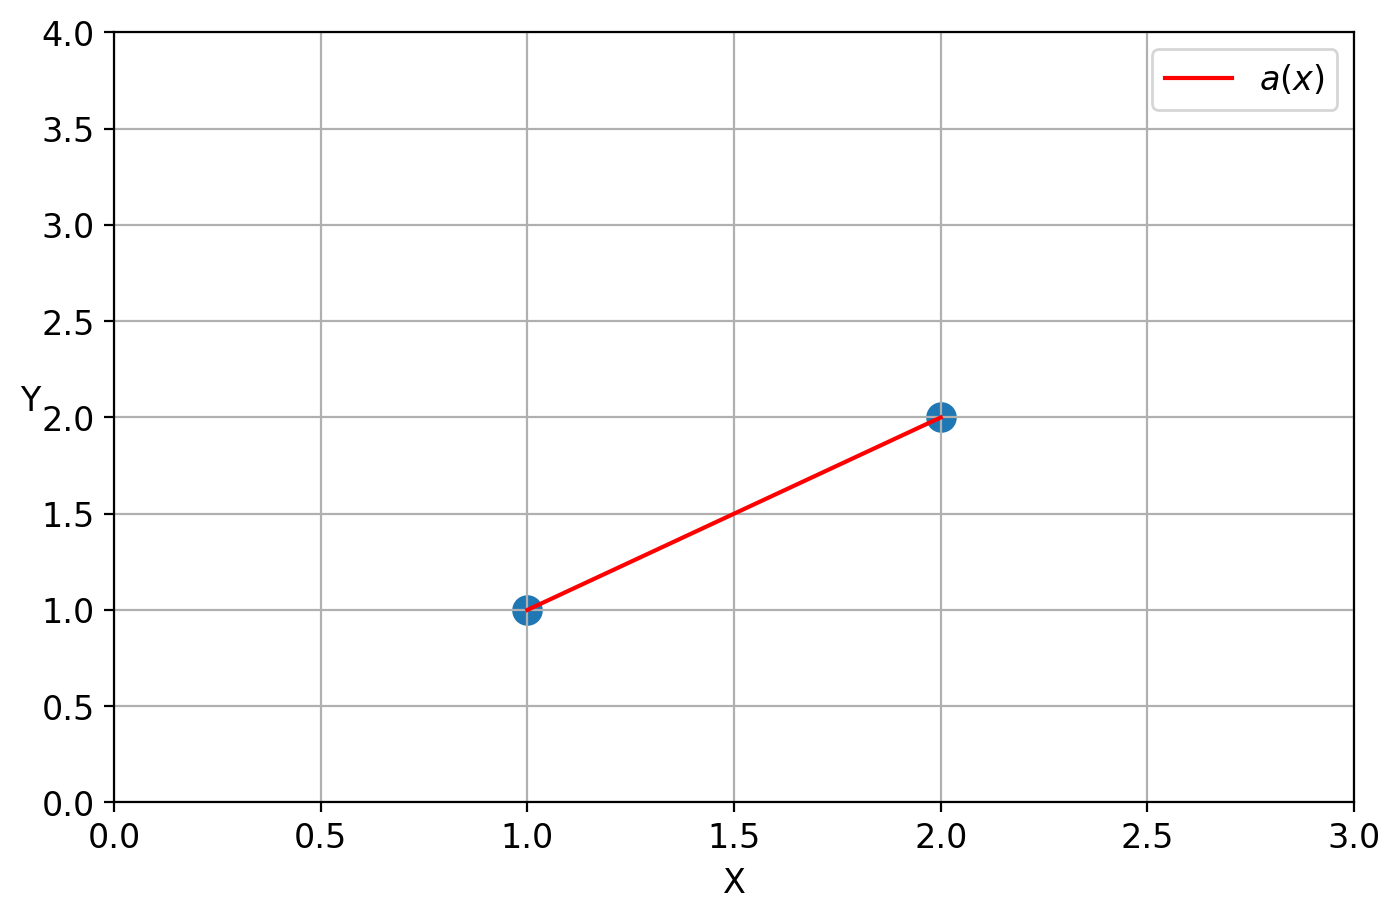

In [37]:
X = np.array([[1], [2]])
y = np.array([1, 2])
ax = plt.gca()
ax.scatter(X, y, s=100)
ax.plot(X, y, c="red", label="$a(x)$")
ax.set_xlabel('X')
ax.set_xlim(0, 3)
ax.set_ylim(0,4)
ax.set_ylabel('Y', rotation=0)
ax.legend()
ax.grid()
plt.show()

Очевидный и точный ответ $a(x) = x$. Он минимизирует расстояние (то есть нашу фунцию ошибки $Q(a,X,Y)$ до $0$.

Однако если добавим в выборку точку $(3, 4)$, то ответ будет другим и функционал не будет достигать $0$ ни при каком алгоритме из выбранного множества.

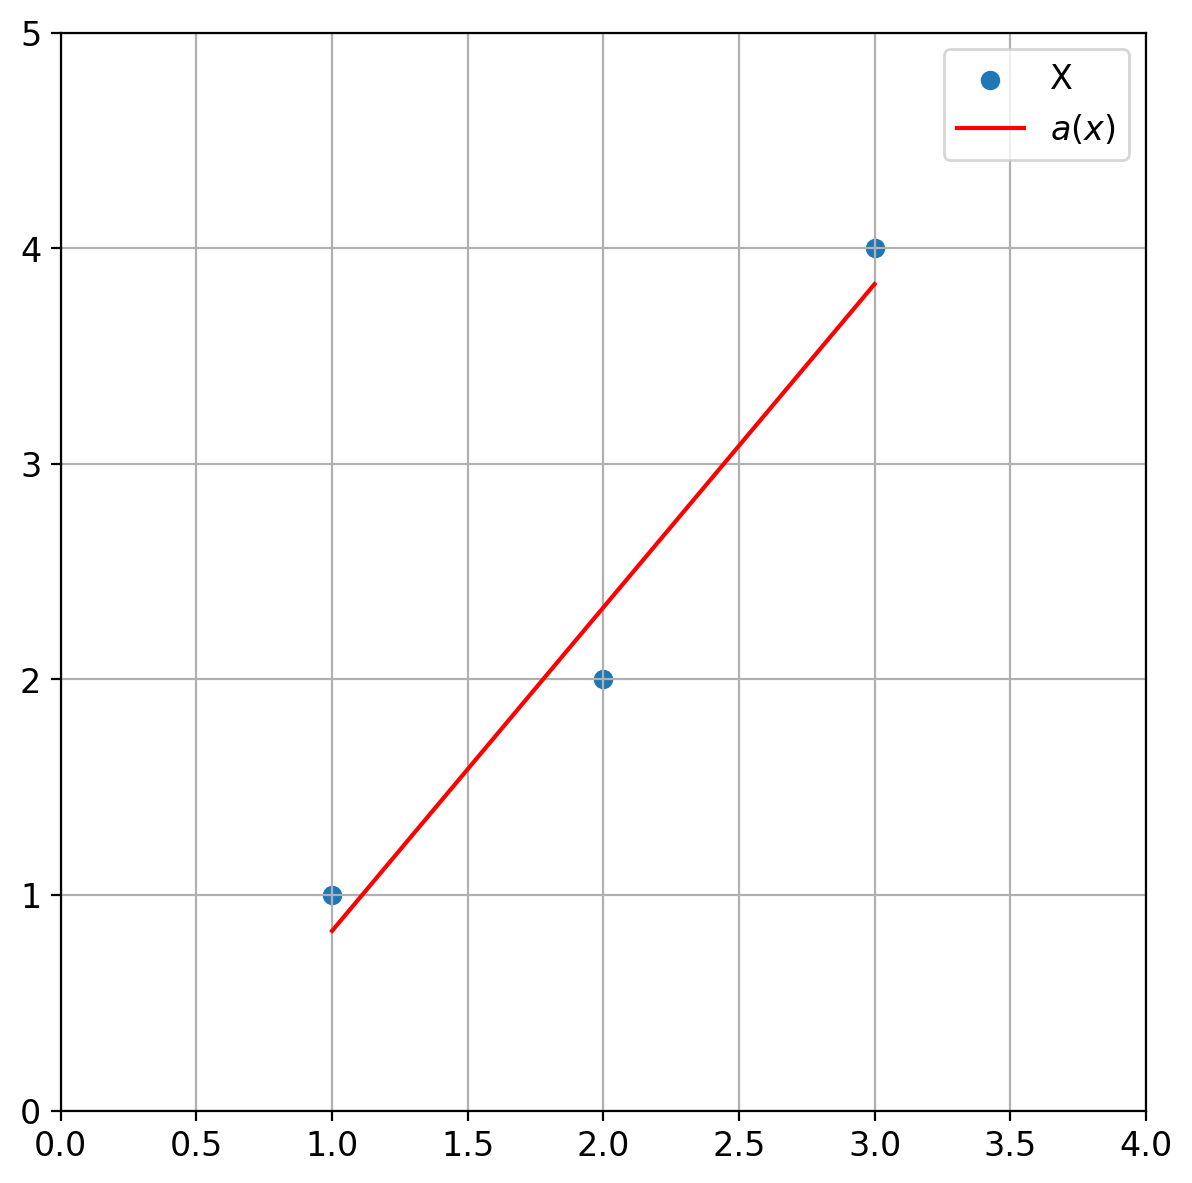

In [93]:
from sklearn.linear_model import LinearRegression

X = np.array([[1], [2], [3]])
y = np.array([1, 2, 4])
ax = plt.gca()
model = LinearRegression().fit(X, y)
ax.scatter(X, y, label="X")
ax.plot(X, model.predict(X), c="red", label="$a(x)$")
ax.set_xlim(0,4)
ax.set_ylim(0,5)
ax.legend()
ax.grid()


## Вопросы
* Какое множество алгоритмов можно выбрать, чтобы функционал из примера выше мог достичь $0$?
* Имеет ли смысл алгоритм $a(x) = 0$?
* Имеет ли смысл функционал $Q(a) = 0$?
* Почему берем $Q(a,X,Y) = \sum_{i=1}^{n}(a(x_i) - y_i)^2$? Можно ли взять модуль?

## Итог

В задаче нужно выбрать семейство алгоритмов и функцию ошибки, а потом найти наилучший алгоритм, решающий задачу в этих условиях.

Творческий процесс происходит именно здесь: нам нужно как-то перевести фразу `"хорошо решать задачу"` на с человеческого языка на машинное обучение.

Далее следует техническая часть нахождения $a \in \mathbb{A}$. Которая и называется `обучением`

**Вопрос:** как описать задачу по разделению фотографий котиков и собак?

# 2.2 Формат данных

### Что такое объект из $\mathbb{X}$?

$x_i$ - объект. Он описывается набором признаков (features). Например $\mathbb{X}$ - множество всех машин. 
Чем можем ее описать?

- Новая, с пробегом
- Пробег, расход бензина, мощность\объем двигателя
- Марка, цвет, страна производства
- Комплектация



Если признаки разделить на типы: 
- `Бинарные`: $\{0, 1\}$
- `Количественные`: $ \mathbb{Q}, \mathbb{Z}, \mathbb{N}$
- `Категориальные`: *{ Пол, Город, Страна, Персонаж в Dota2 и т.д. }*
- `Порядковые`: *{ Уровень образования(Бакалавр, Магистр,...), Ранг в CSGO и т.д. }*


### Что такое ответ из $\mathbb{Y}$?

Тоже признак или набор признаков. Но пока будем говорить только об одном признаке.

# 2.3 Задачи и алгоритмы

В основе, есть две задачи МО
* **Классификация** ($\mathbb{Y}$ - конечное)
* **Регрессия** ($\mathbb{Y}$ - бесконечное)
* есть еще разное типа unsupervised, semi-supervised, RL...

Для упрощения далее мы будем рассматривать пример **2-х классовой классификации** и **регрессии на $\mathbb{R}$**

## Генерация выборок
### Классификация
Сгенерируем выборку для 2 классов. 

In [94]:
np.random.seed(1337) 
n = 200
a = np.random.normal(loc=0, scale=1, size=(n, 2))  # первый класс
b = np.random.normal(loc=3, scale=2, size=(n, 2))  # второй класс
X_clf = np.vstack([a, b])  # двумерный количественный признак
y_clf = np.hstack([np.zeros(n), np.ones(n)])  # бинарный признак


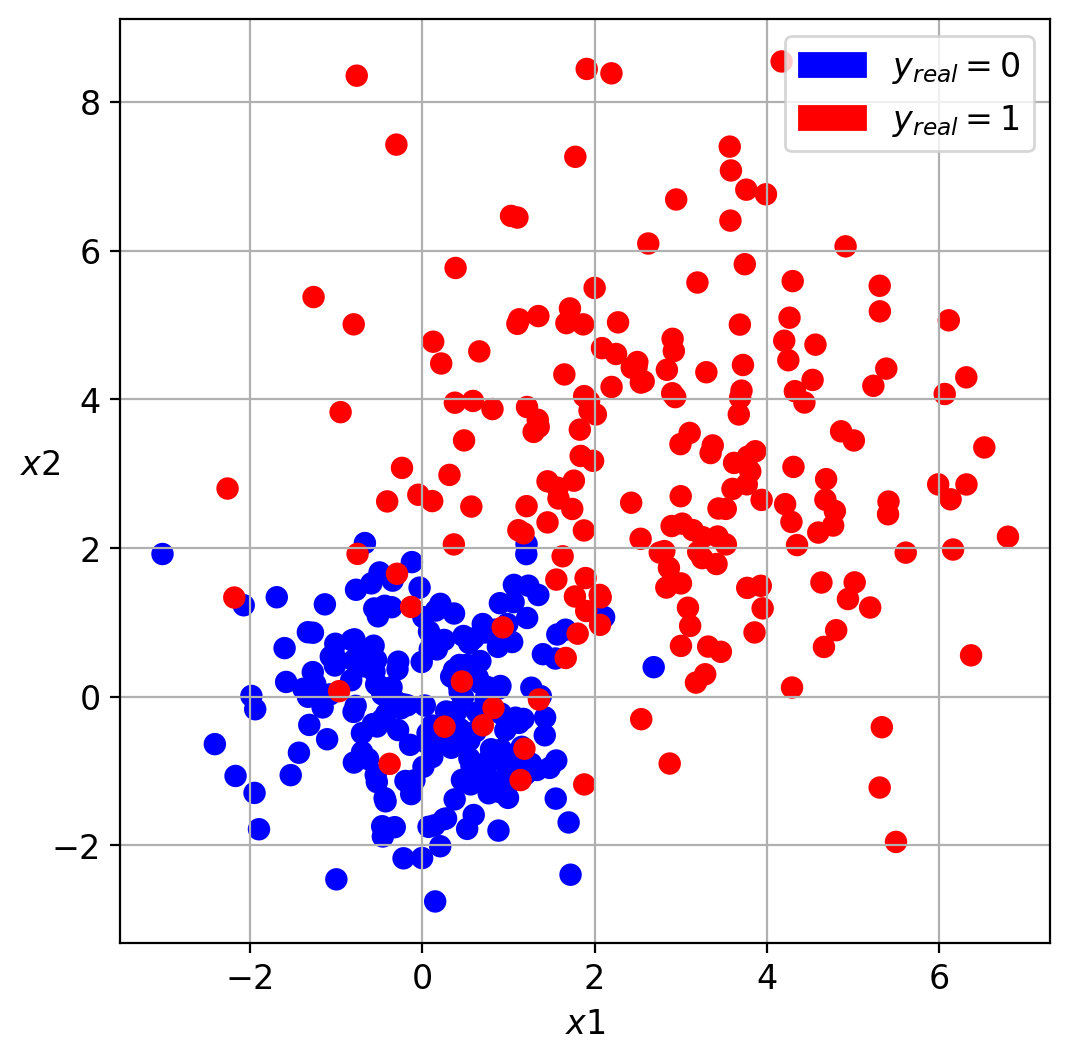

In [95]:
import matplotlib.patches as mpatches

plt.figure(figsize=(6, 6))
plt.scatter(X_clf[:, 0], X_clf[:, 1], c=y_clf, cmap="bwr", s=50, alpha=1)
plt.xlabel("$x1$")
plt.ylabel("$x2$", rotation=0)
blue_patch = mpatches.Patch(color="blue", label="$y_{real}=0$")
red_patch = mpatches.Patch(color="red", label="$y_{real}=1$")
plt.legend(handles=[blue_patch, red_patch])
plt.grid()


## [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier)
Основная идея: 
* запоминаем все точки в выборке
* когда хотим предсказать точку, ищем k ближайших точек (по умолчанию 5)
* из какого класса точек среди ближайших больше - тот класс и предсказывается новой точке.

### 1.Импортируем классификатор

In [99]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)  # получаем экземпляр модели 
knn.fit(X_clf, y_clf)  # обучаем модель на данных
# knn.predict(np.array([[2, 0], [0, 2]])) # предсказываем класс
knn.predict_proba(np.array([[2, 0], [0, 2]])) # предсказываем вероятности класса


array([[0.5, 0.5],
       [0.5, 0.5]])

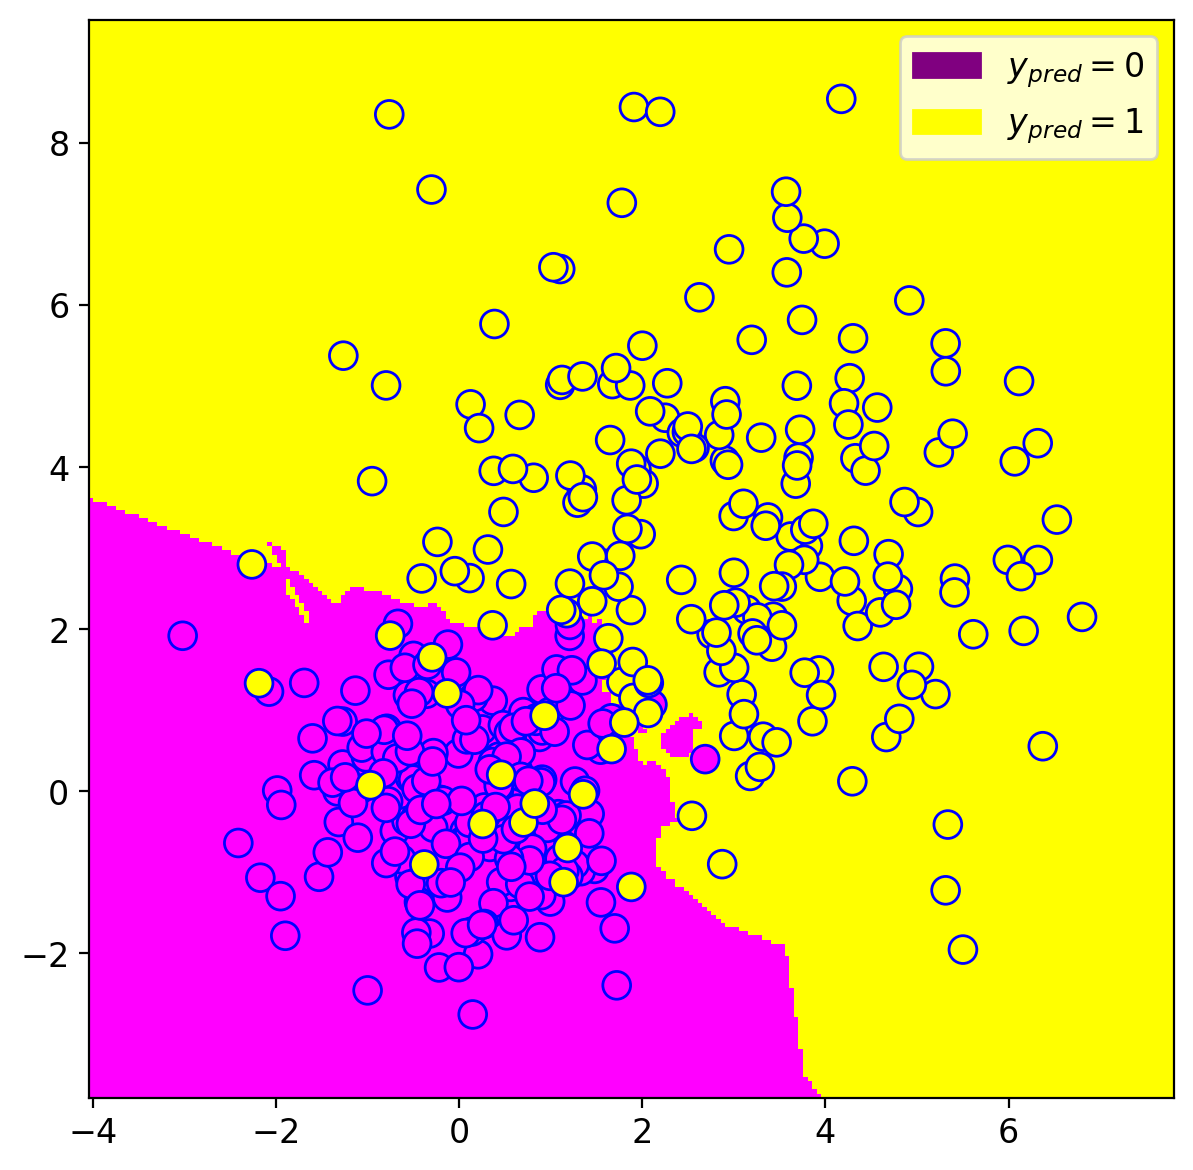

In [98]:
from utils import plot_model
plot_model(X_clf, y_clf, knn)


#### посмотрим как меняются вероятности классов:

Кстати, как можно посчитать вероятность в knn?

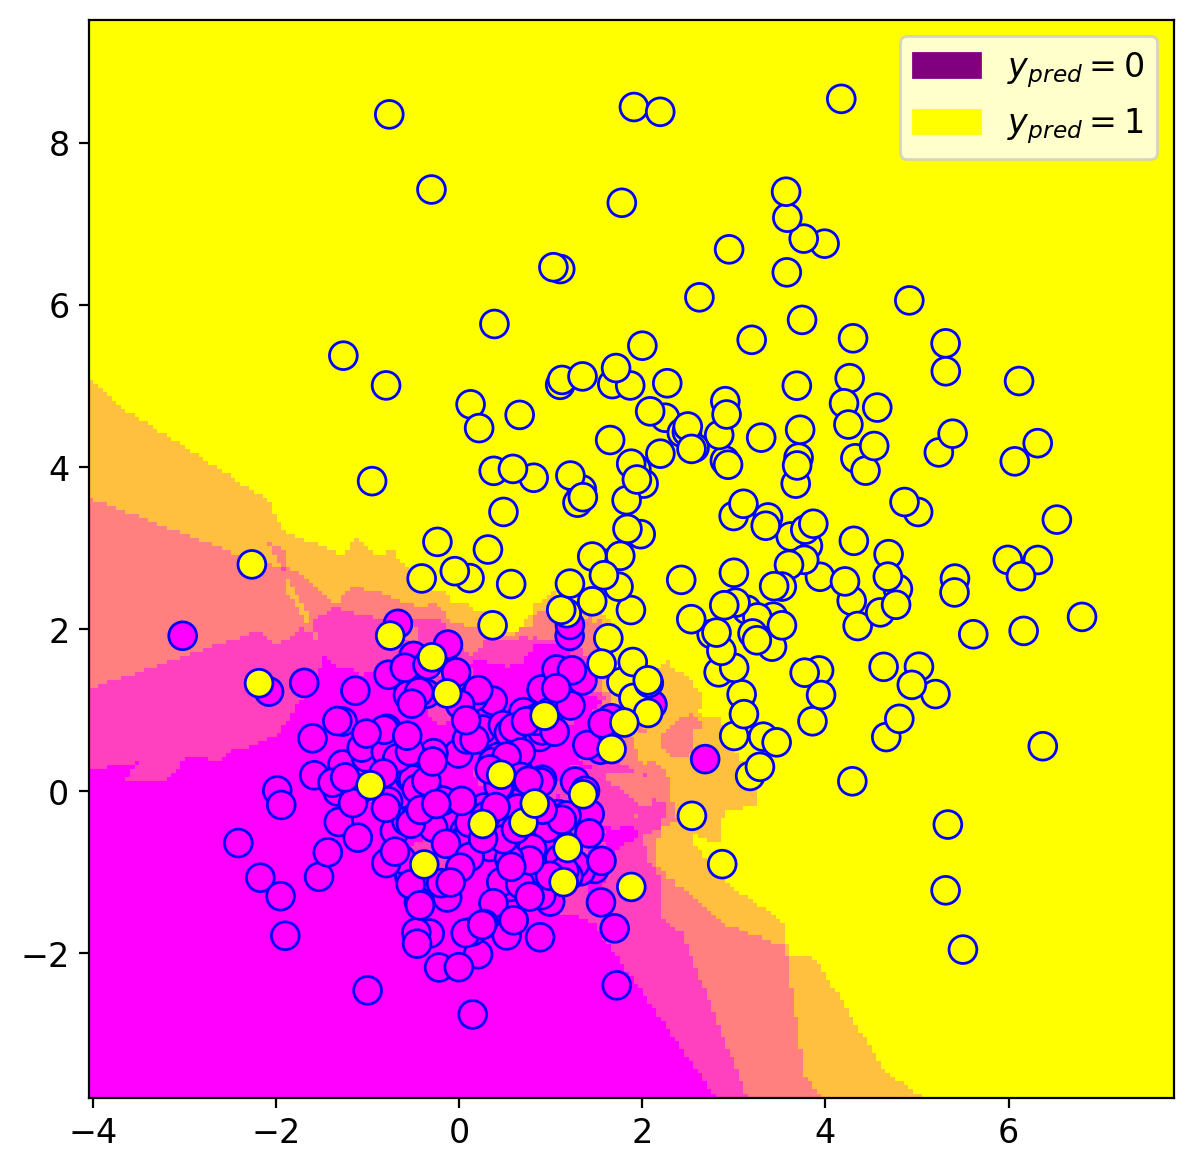

In [57]:
plot_model(X_clf, y_clf, knn, proba=True)

#### Покрутим число соседей, посмотрим что поменяется

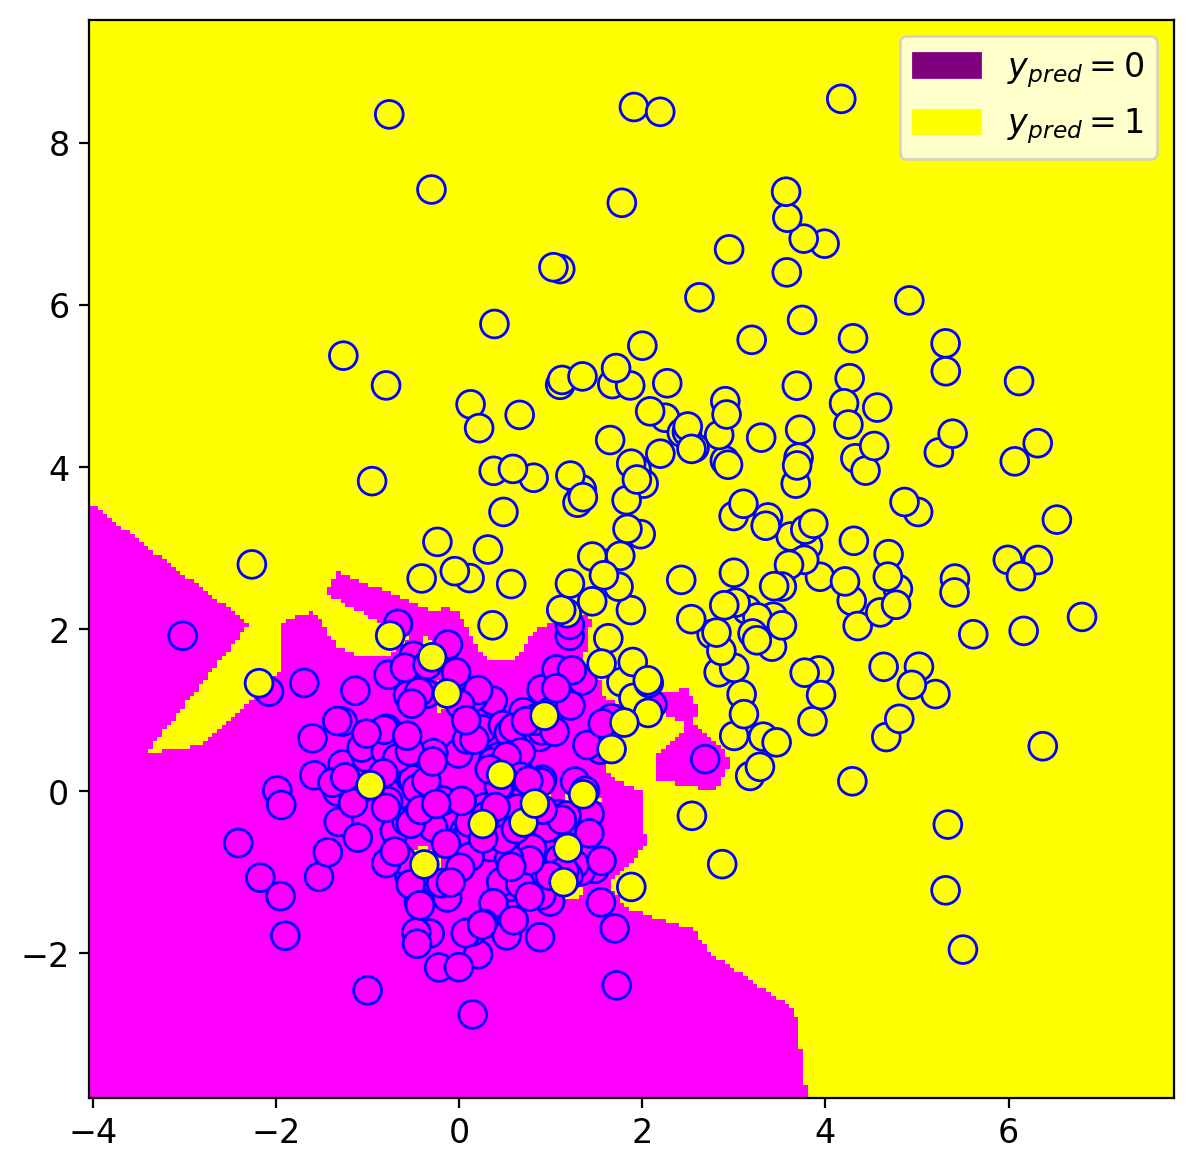

In [104]:
knn = KNeighborsClassifier(n_neighbors=1) # а если взять 100)?
knn.fit(X_clf, y_clf) 
plot_model(X_clf, y_clf, knn, proba=True)


### Регрессия
Создадим функцию $\mathcal{F}(x) = \sqrt{x} + sin(x)$

In [105]:
def f(x):
    return np.sqrt(x) + np.sin(x)


vf = np.vectorize(f)
rng = np.random.RandomState(1)

X_reg = np.arange(0, 10, 0.2)[:, np.newaxis]
y_reg = vf(X_reg) + (rng.rand(50)[:, np.newaxis] / 3)  # добавляем шумы



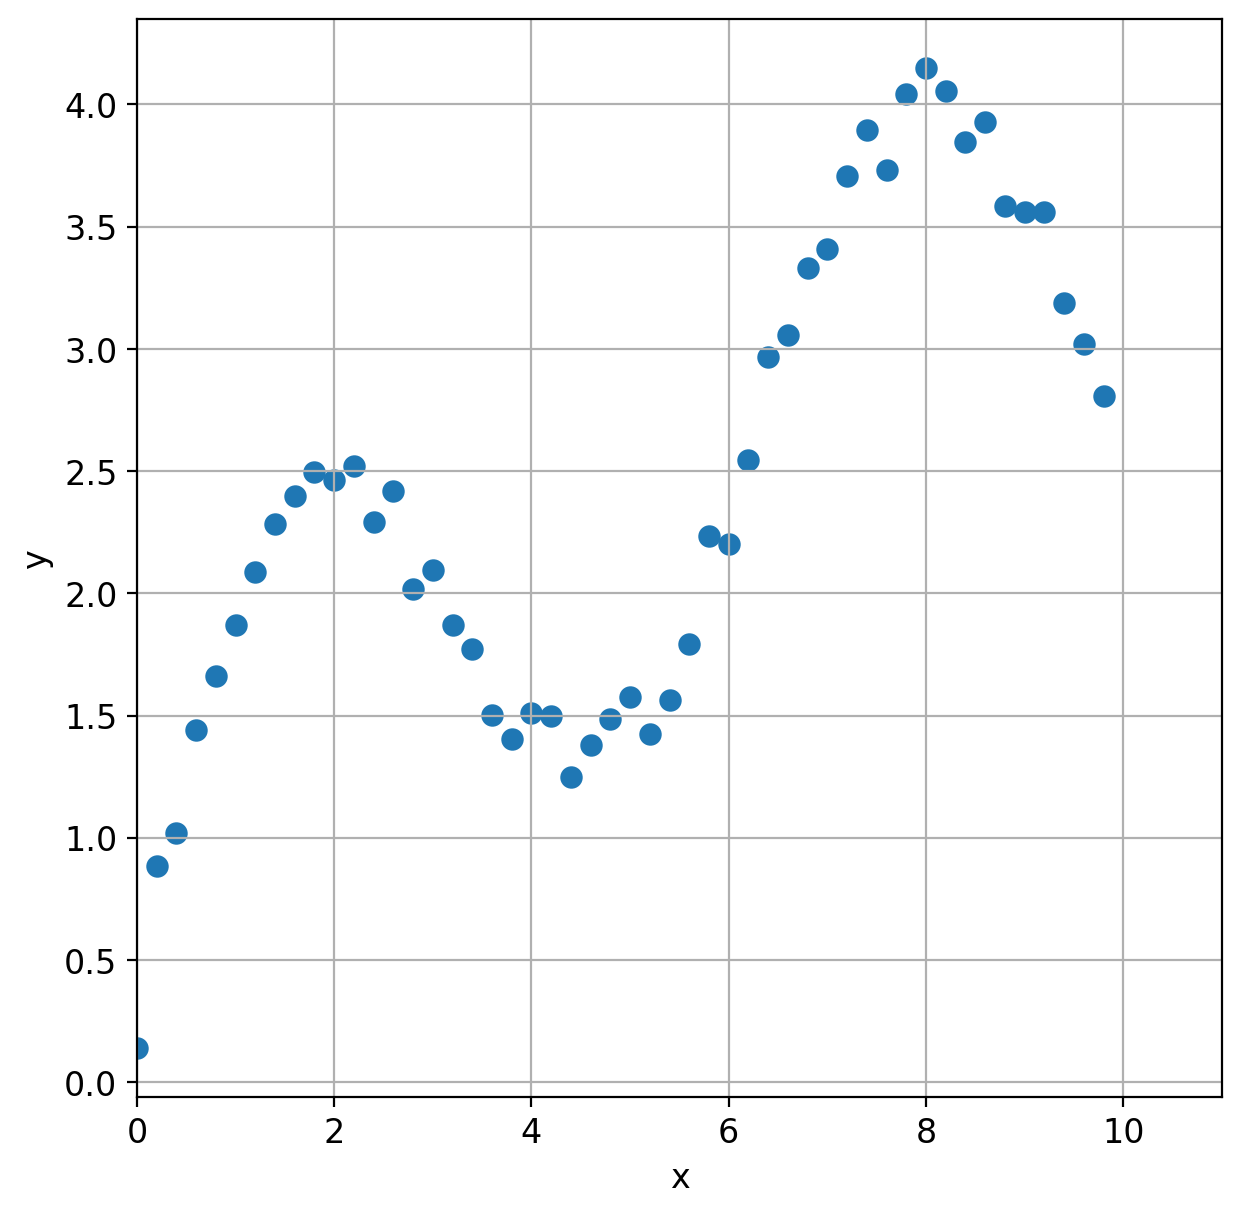

In [106]:
import matplotlib.pyplot as plt

plt.scatter(X_reg, y_reg, s=50, alpha=1)
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0,11))
plt.grid()

## Чем можно такую функцию предсказать (приблизить)?

In [26]:
X_reg.shape

(50, 1)

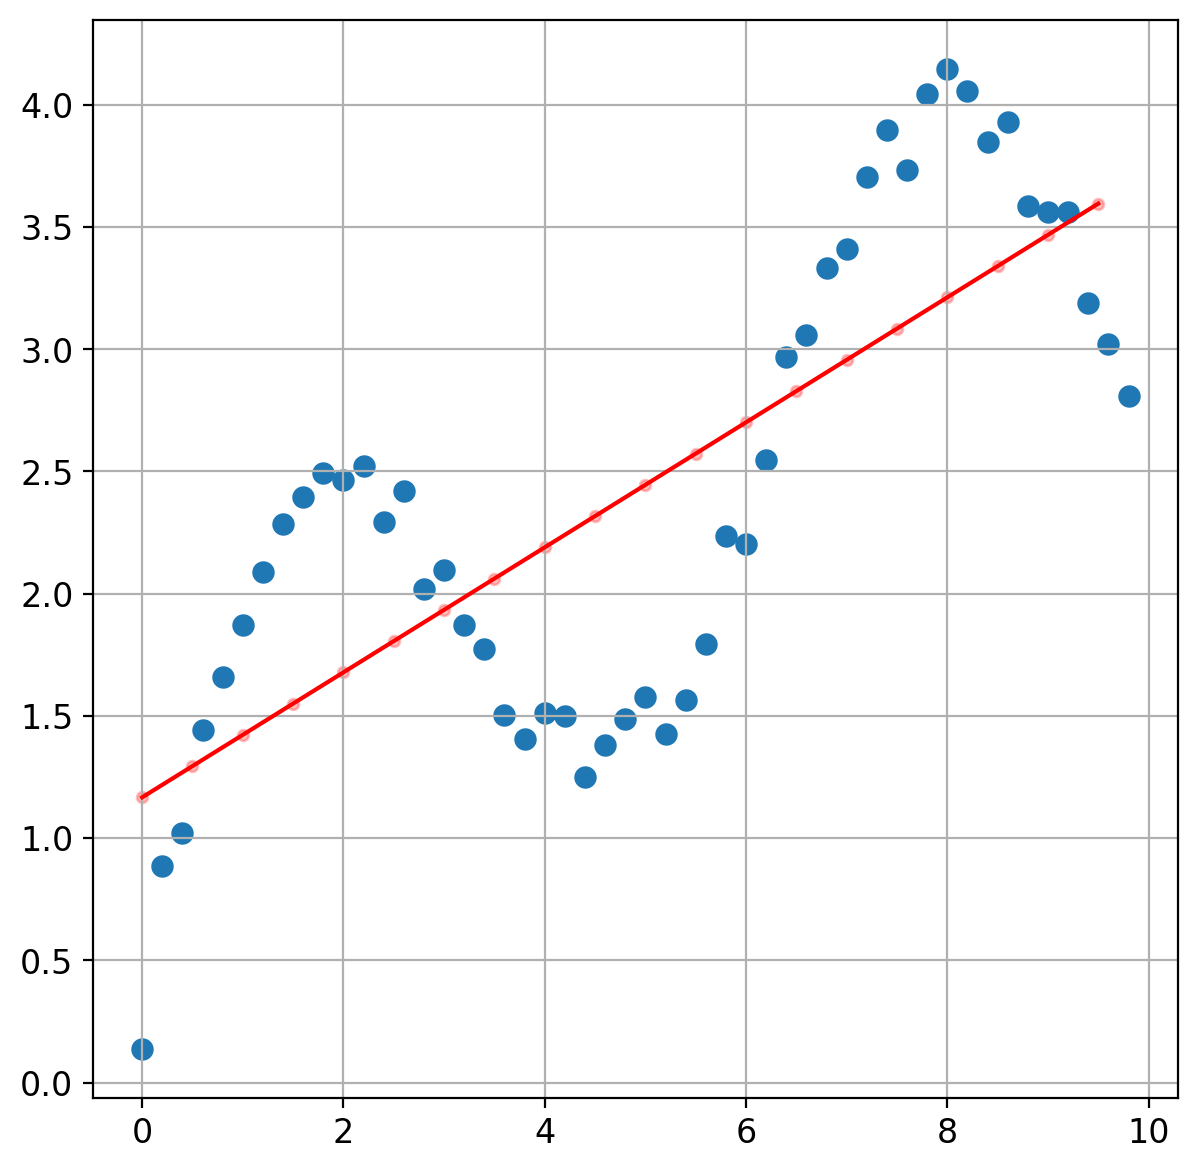

In [107]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
X_reg_test = np.arange(0, 10, 0.5)[:, None]
linreg.fit(X_reg, y_reg)
Y_reg_test = linreg.predict(X_reg_test)


plt.scatter(X_reg, y_reg, s=50, alpha=1)
plt.scatter(X_reg_test, Y_reg_test, color='r', alpha=.25, s=15)
plt.plot(X_reg_test, Y_reg_test, color='r', alpha=1)

plt.grid()


Ну такое) 

На самом деле логично. Линейная регрессия - пространство  полиномов 1 степени. ($w_0x + w_1$), то есть прямых. Лучше мы уже не приблизим.

* **Вопрос:** Как мы можем улучшить модель?

или

нереальные фокусы



/var/folders/fm/931yzsgx4t52sj8yn6jcw0gc0000gn/T/ipykernel_24356/899294792.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_reg, y_reg, cmap='bwr', s=50, alpha=1)


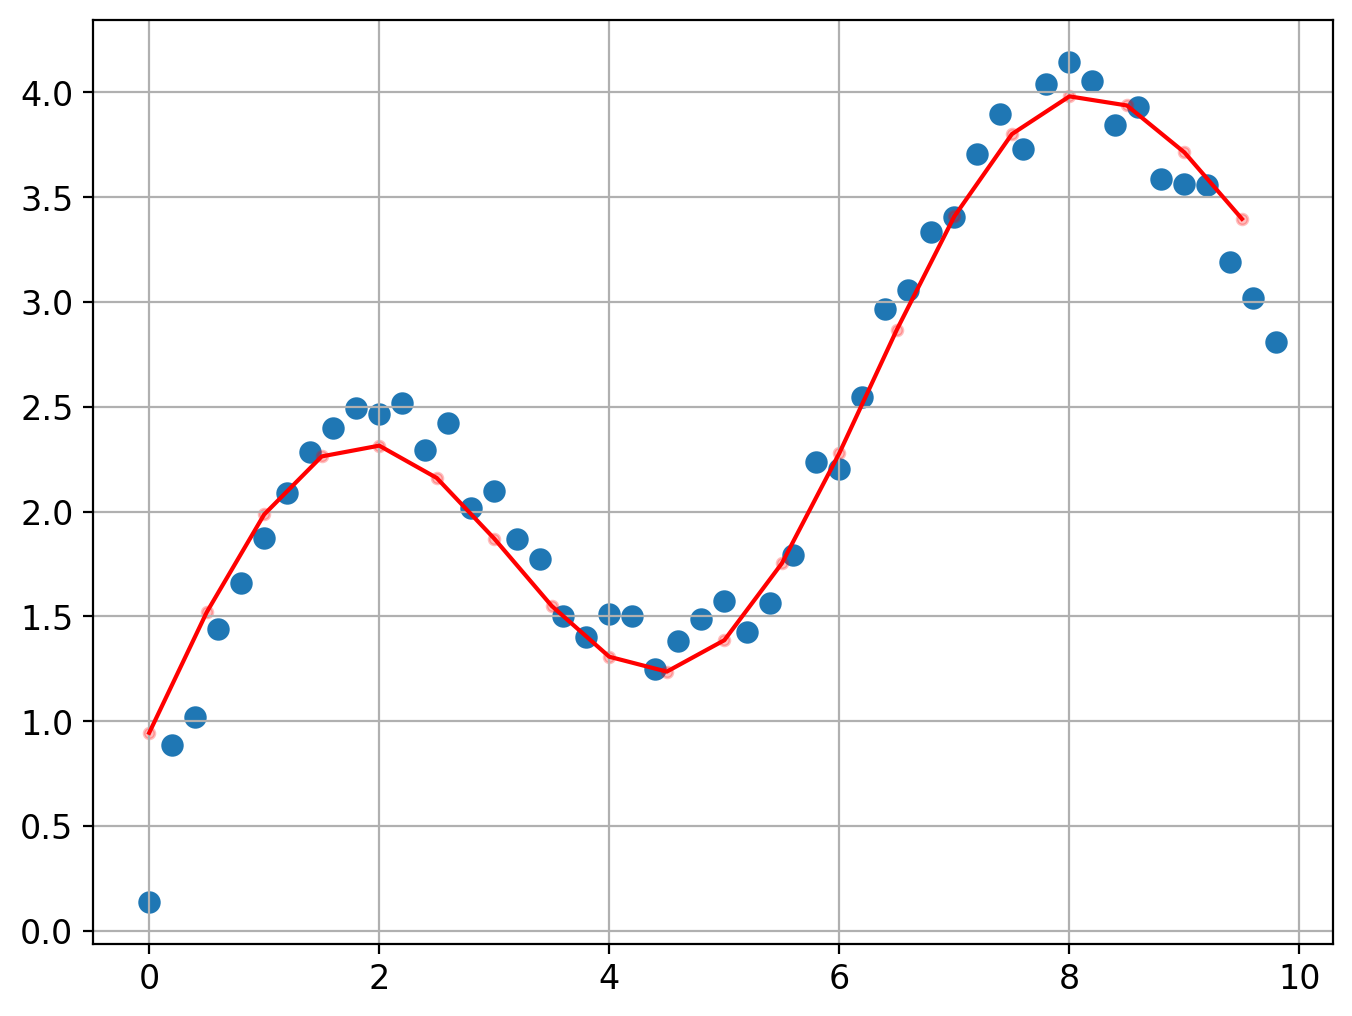

In [108]:
linreg = LinearRegression()
X_reg_test = np.arange(0, 10, 0.5)[:, None]

X_reg_sin = np.concatenate([X_reg, np.sin(X_reg)], axis=1)
X_reg_sin_test = np.concatenate([X_reg_test, np.sin(X_reg_test)], axis=1)
linreg.fit(X_reg_sin, y_reg)
Y_reg_test = linreg.predict(X_reg_sin_test)

plt.figure(figsize=(8, 6))
plt.scatter(X_reg, y_reg, cmap='bwr', s=50, alpha=1)
plt.scatter(X_reg_test, Y_reg_test, color='r', alpha=.25, s=15)
plt.plot(X_reg_test, Y_reg_test, color='r', alpha=1)
plt.grid()

In [41]:
linreg.coef_



array([[0.26546932, 0.92328846]])

## Можем ли поменять местами алгоритмы и задачи?

То есть использовать linreg для классификации и knn для регрессии?

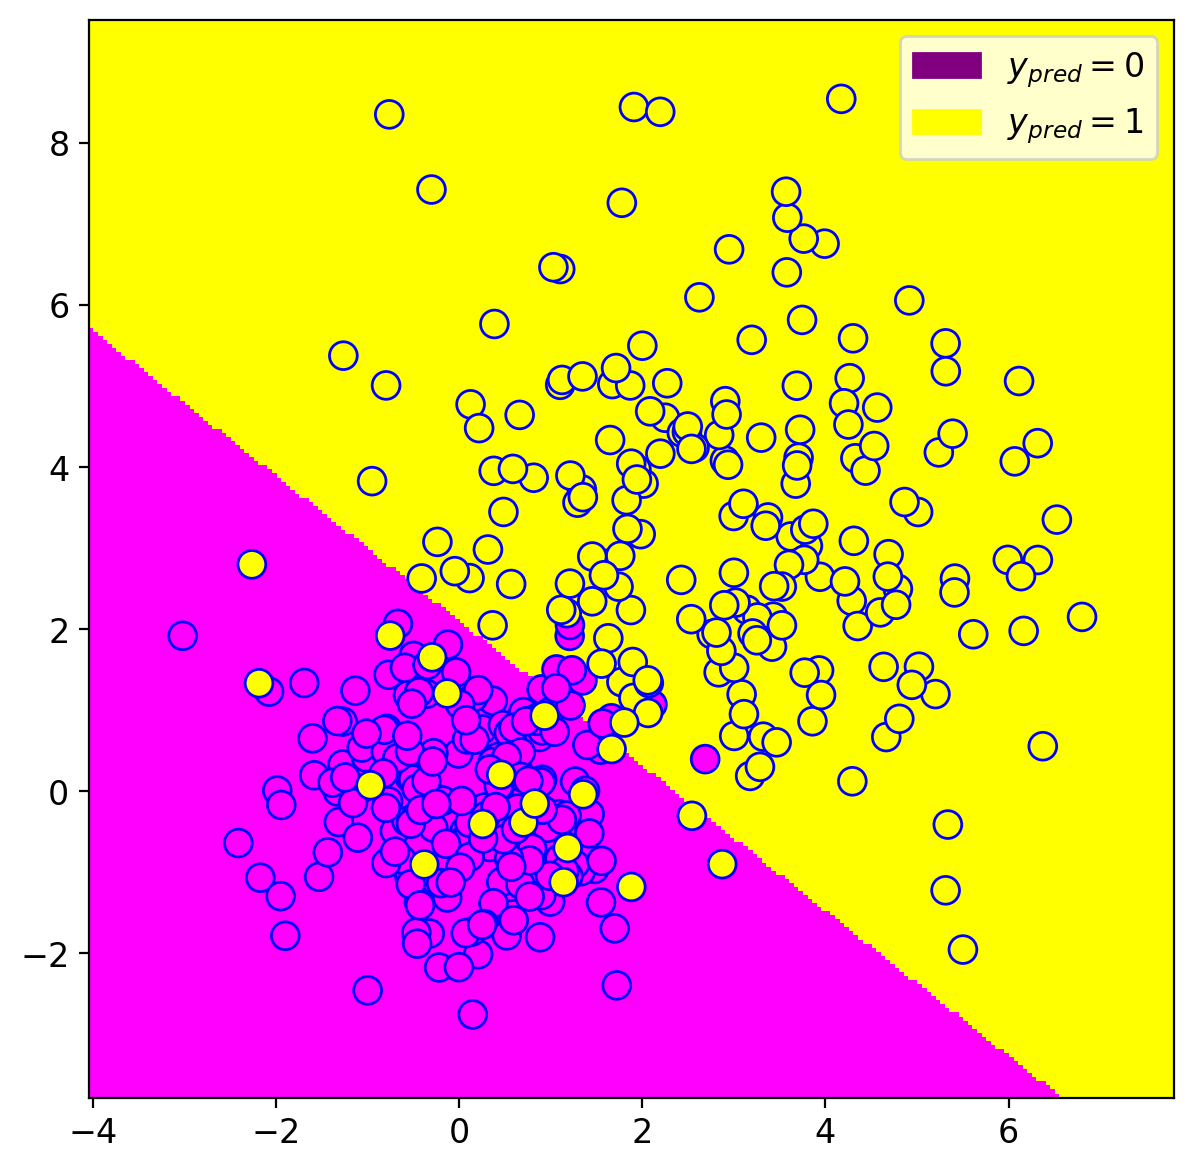

In [109]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver="newton-cg").fit(X_clf, y_clf)
plot_model(X_clf, y_clf, log_reg)


## [KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)

Идея: находим k ближайших соседей к новой точке и берем их **средние** координаты.

![knnreg](images/knnreg.png)


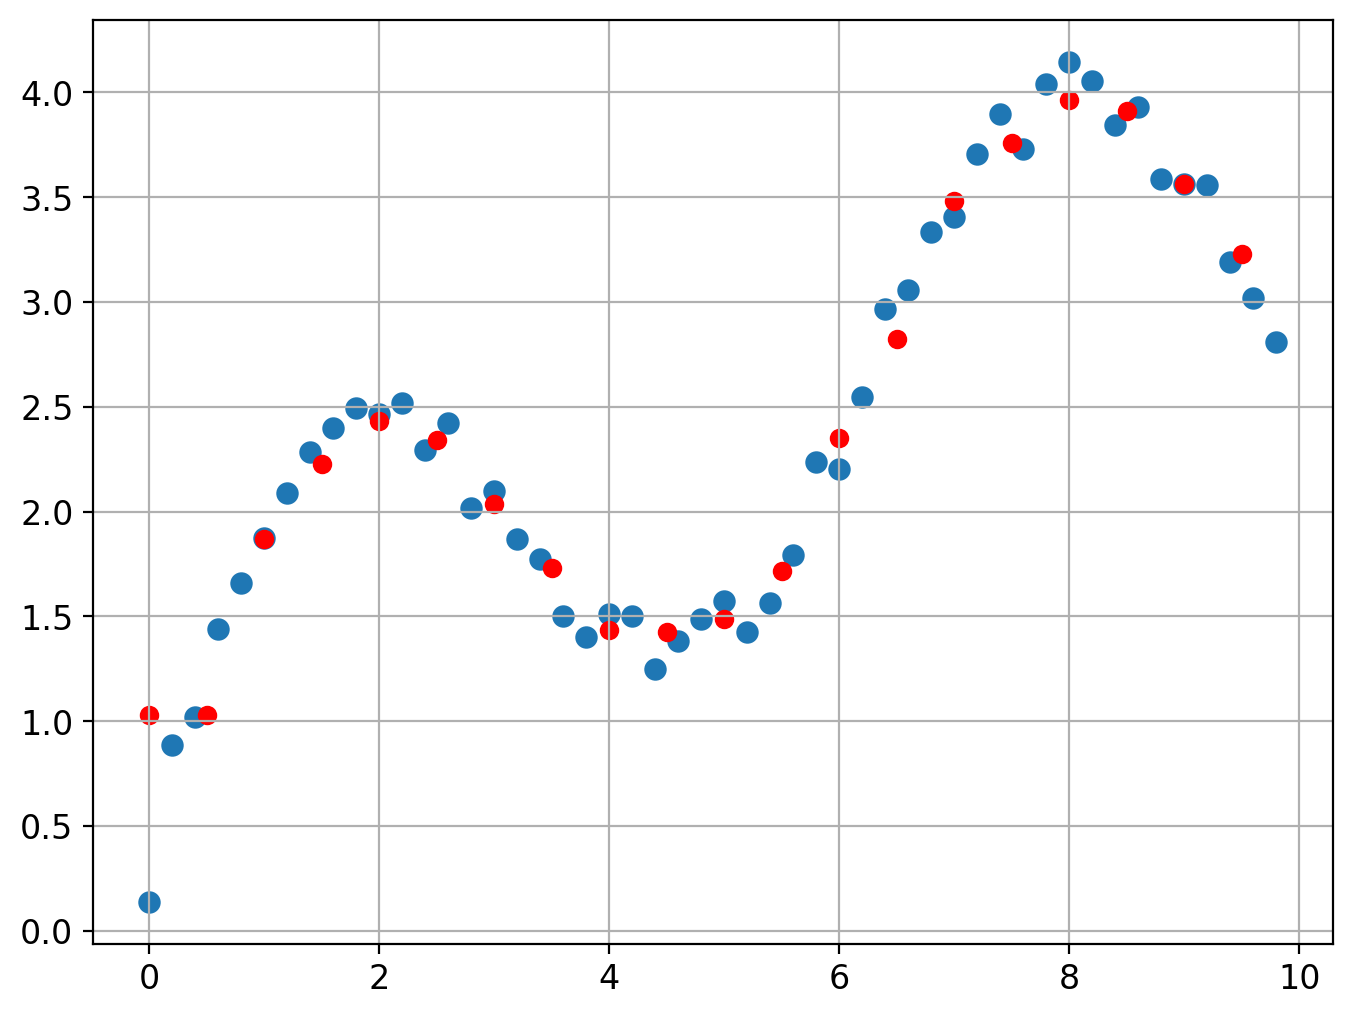

In [111]:
from sklearn.neighbors import KNeighborsRegressor 

knr = KNeighborsRegressor()

knr.fit(X_reg, y_reg)
Y_reg_test = knr.predict(X_reg_test)

plt.figure(figsize=(8, 6))
plt.scatter(X_reg, y_reg, s=50, alpha=1)
plt.scatter(X_reg_test, Y_reg_test, color='r', alpha=1)
plt.grid()

## Есть еще много других методов, типа деревьев, svm, бустингов и тд..


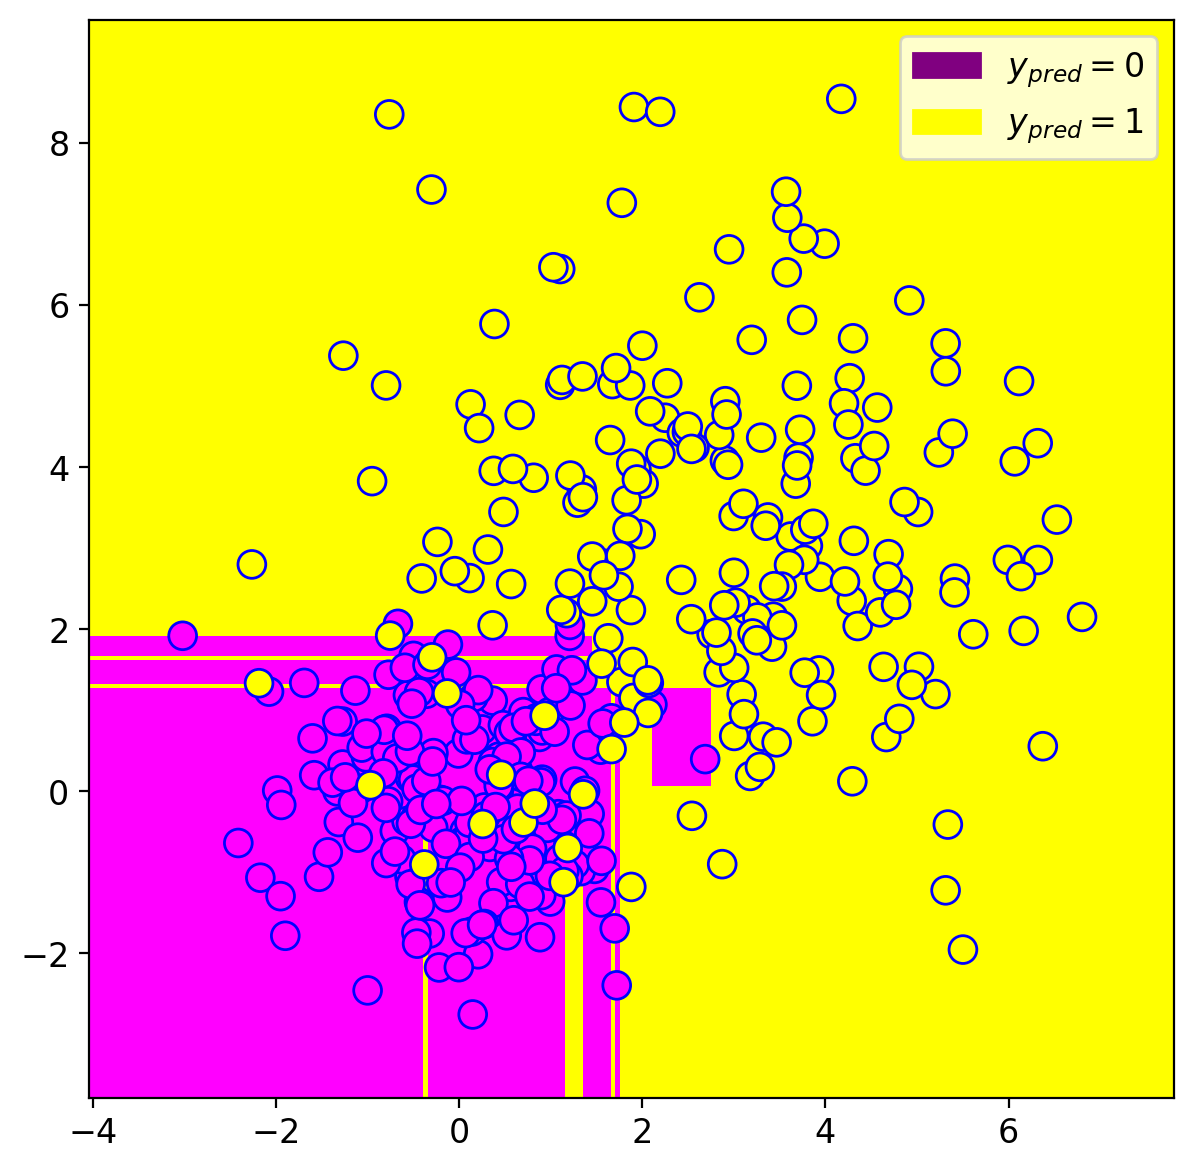

In [121]:
from sklearn.tree import DecisionTreeClassifier

clf_dtc = DecisionTreeClassifier(max_depth=10).fit(X_clf, y_clf)
plot_model(X_clf, y_clf, clf_dtc)

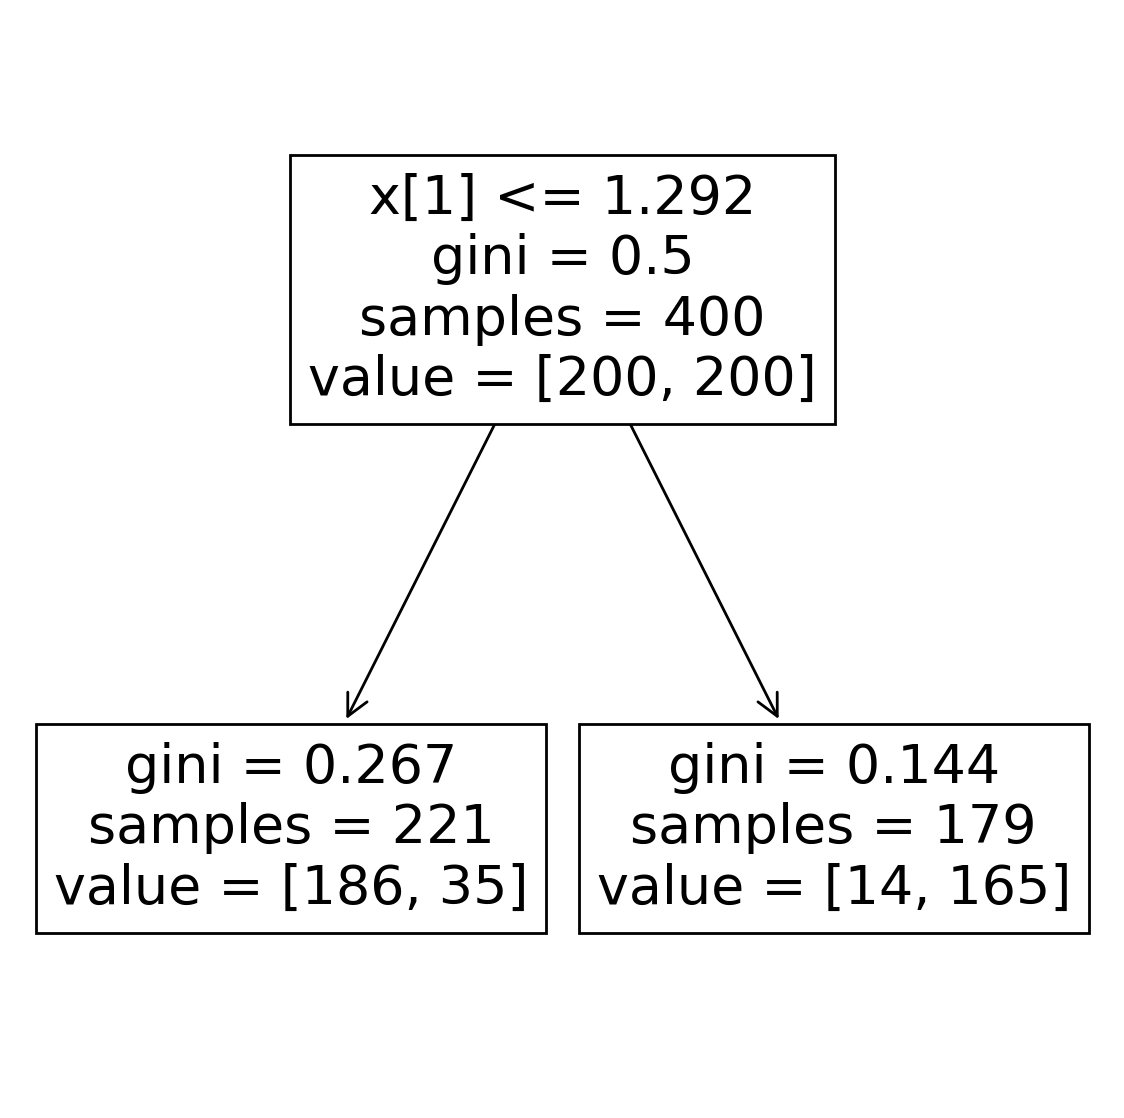

In [115]:
import sklearn
_  = sklearn.tree.plot_tree(clf_dtc)

/Users/admin/cpm/cpm/1-intro/utils.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X, y, cmap='bwr', s=50, alpha=1)


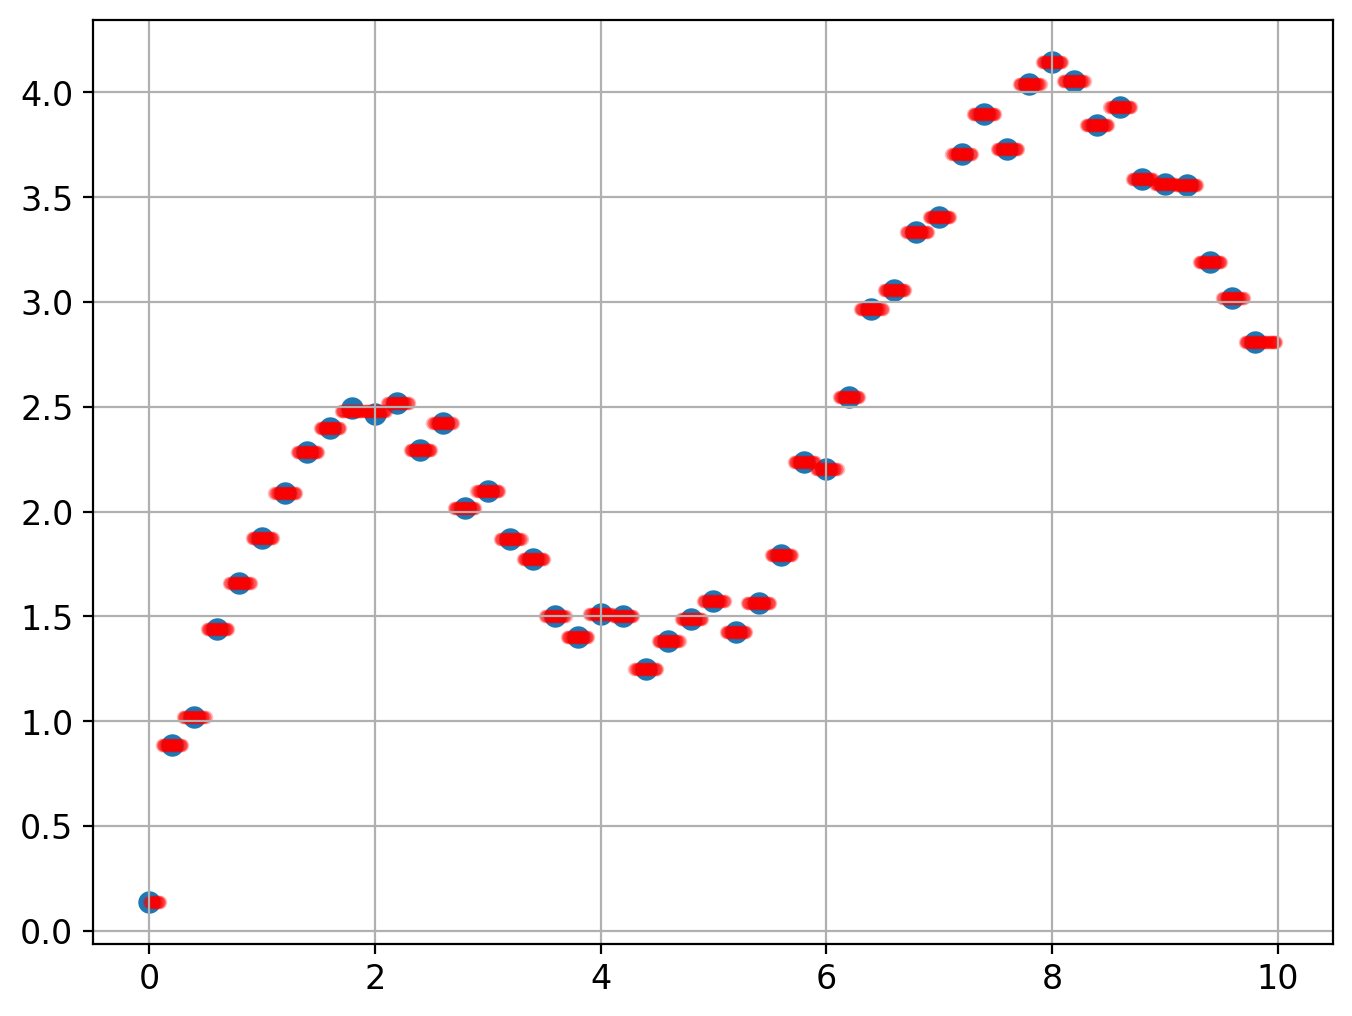

In [120]:
from sklearn.tree import DecisionTreeRegressor

clf_knd = DecisionTreeRegressor(max_depth=10)
X_test = np.arange(0, 10, 0.01)[:, np.newaxis]
plot_reg(X_reg, y_reg, clf_knd, X_test, kind='scatter')

Вопрос - сколько различных ответов у дерева может быть?

## Что еще можем перебрать?


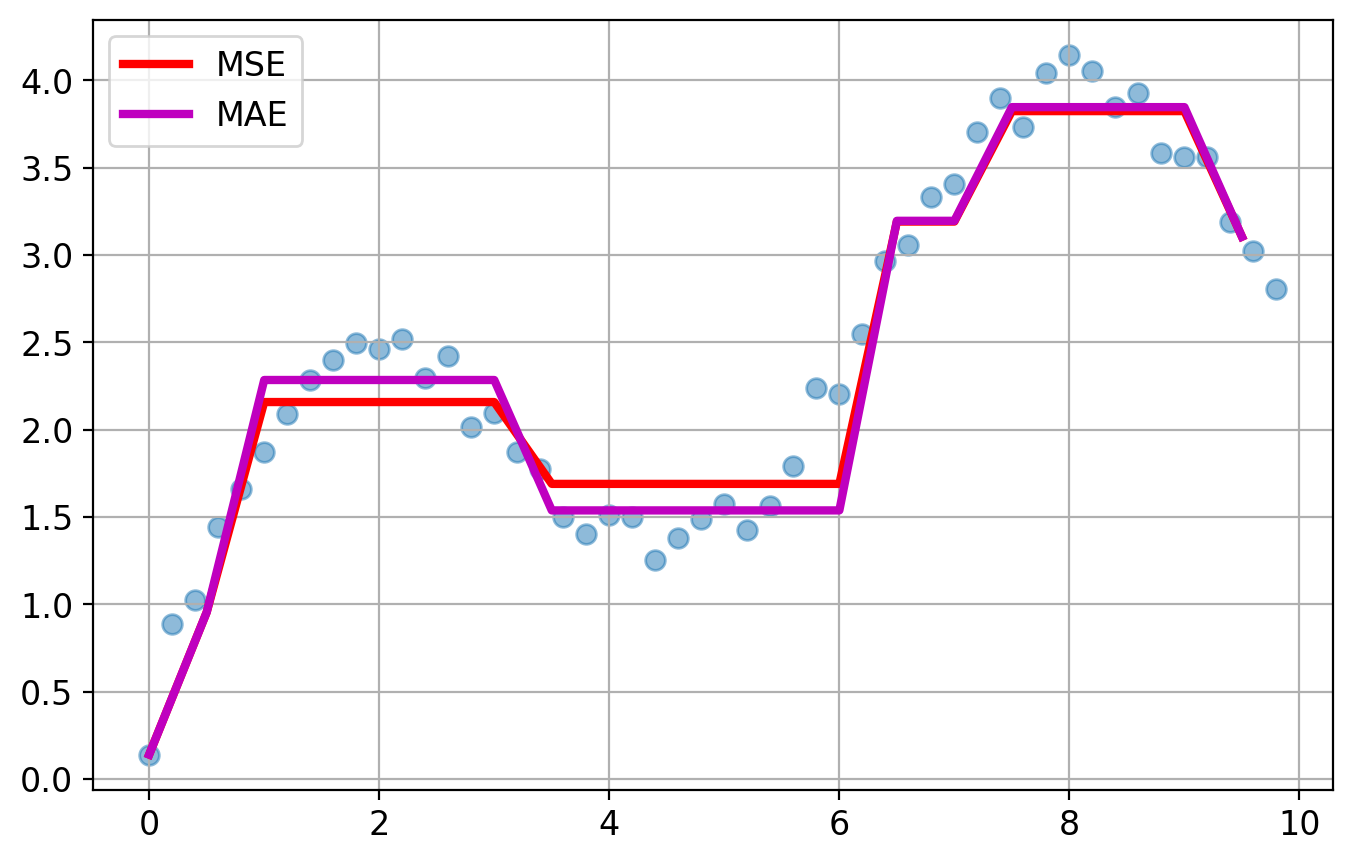

In [73]:
reg_dtr_mse = DecisionTreeRegressor(criterion="squared_error", max_depth=3)  # default
reg_dtr_mae = DecisionTreeRegressor(criterion="absolute_error", max_depth=3)

reg_dtr_mse.fit(X_reg, y_reg)
Y_pred_mse = reg_dtr_mse.predict(X_reg_test)

reg_dtr_mae.fit(X_reg, y_reg)
Y_pred_mae = reg_dtr_mae.predict(X_reg_test)


plt.scatter(X_reg, y_reg, s=50, alpha=0.5)
plt.plot(X_reg_test, Y_pred_mse, "r", label="MSE", lw=3)
plt.plot(X_reg_test, Y_pred_mae, "m", label="MAE", lw=3)
plt.legend()
plt.grid()

## Качество модели, переобучение


Вот мы перебираем разные 

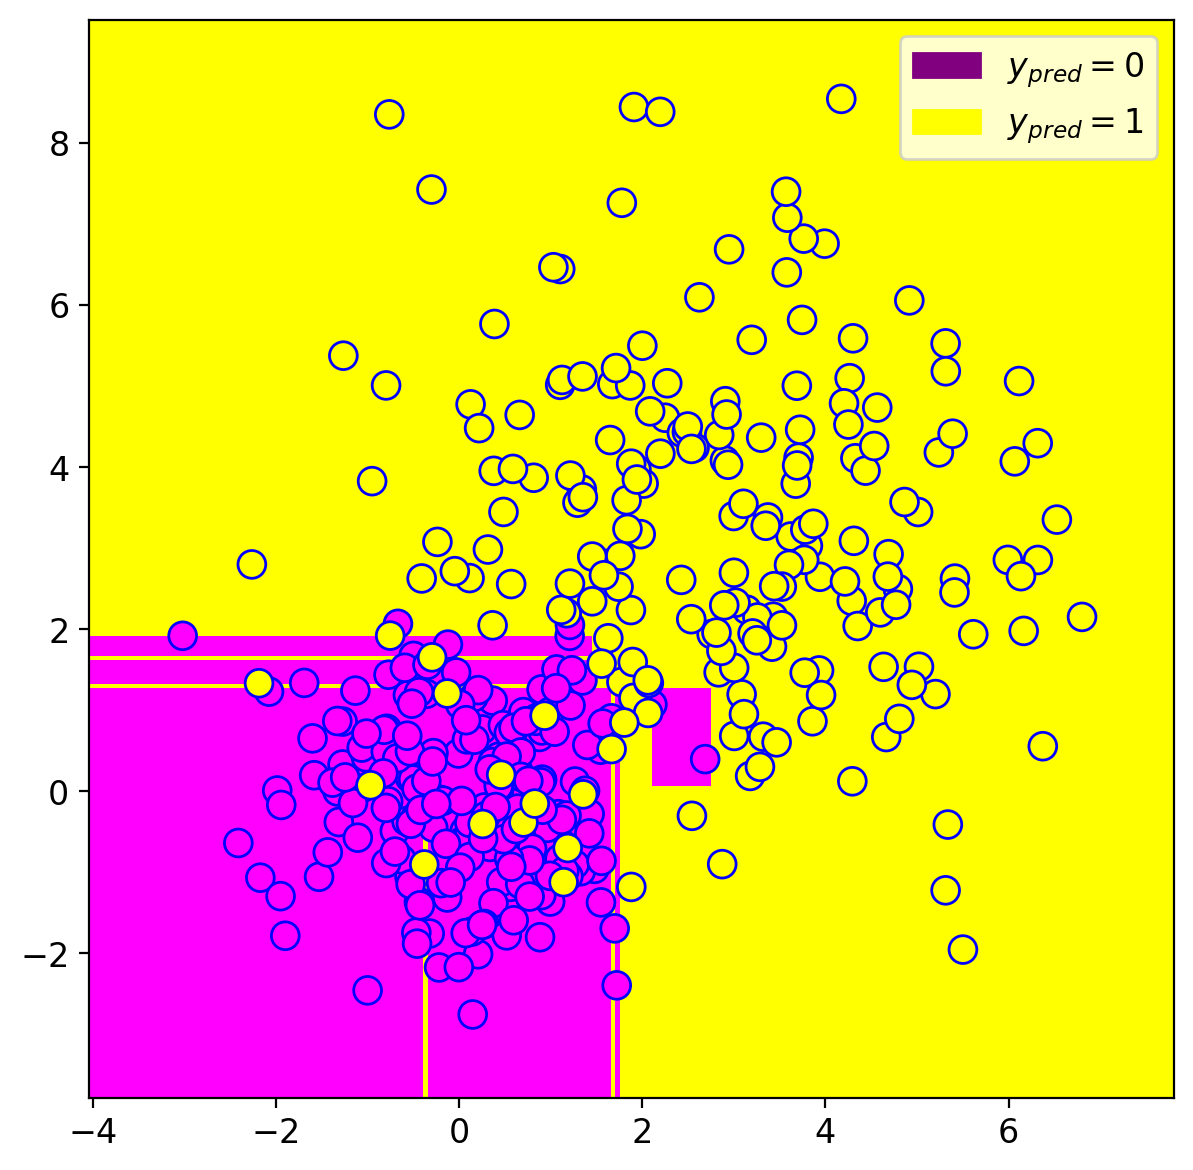

In [79]:
clf_dtc = DecisionTreeClassifier(max_depth=10).fit(X_clf, y_clf)
plot_model(X_clf, y_clf, clf_dtc)

Заметим, что данное разбиение слишком сильно опирается на тренировочную выборку: есть области желтого внутри фиолетового, что с большой вероятностью неверно. И новый тестовый объект будет некорректно классифицироваться из-за этого.
**Переобучение** может возникать в нескольких случаях:
 * Нерепрезентативность выборки в любом смысле: мало данных, или не все классы равнопредставлены или иной дефект. Тогда для алгоритм может обучиться не на общие закономерности в данных, а на какие-то частные взаимосвязи, которые верны для нашей выборки, но не верны в целом.
 * Если в выборке присутствует много `шума` или есть `выбросы`.

`Шум` - небольшие колебания данных, вызванные обычно неточностью приборов, ошибками людей и в целом невозможностью померить все `точно`. Можно считать, что любые данные идут с определенной долей шума.

`Выброс` - серьезное отклонение в данных вызванное ошибками в наблюдениях или естественными аномалиями в данных.

На рисунке сверху боковой квадрат сформировался из-за серьезного шума, который в данном случае сработал как выброс.

Чтобы избавиться от этого эффекта можно упростить модель, чтобы она могла уловить меньшее число зависимостей и из-за этого "смотрела" на самые "сильные" зависимости. Тут мы неявно предполагаем, что взаимосвязи, которые характерны для нашей частной выборки, а не для общей, меньше влияют на ответ, чем "настоящие" зависимости в нашей задаче.
Возьмем `max_depth=3`.

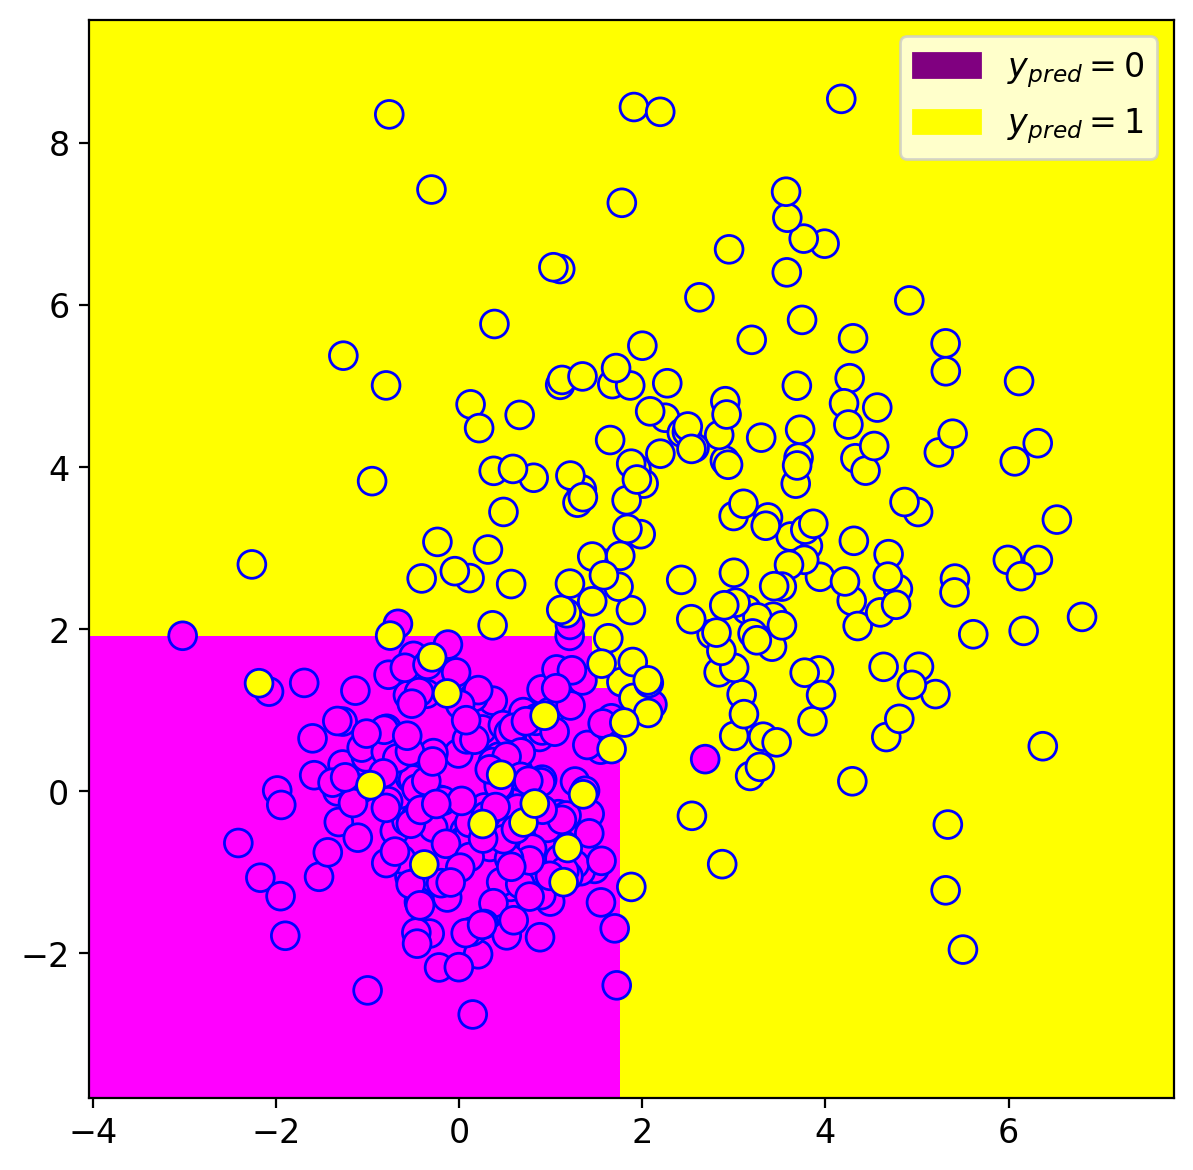

In [81]:
clf_dtc = DecisionTreeClassifier(max_depth=3).fit(X_clf, y_clf)
plot_model(X_clf, y_clf, clf_dtc)

Мы получили неверные ответы для нескольких выбросов, зато получили более разумные суждения в целом. 

Однако нельзя сильно упрощать модель (`max_depth=1`), это может вызвать другую крайность, так как в нашем семействе алгоритмов может не оказаться вообще ничего похожего, на истиную зависимость

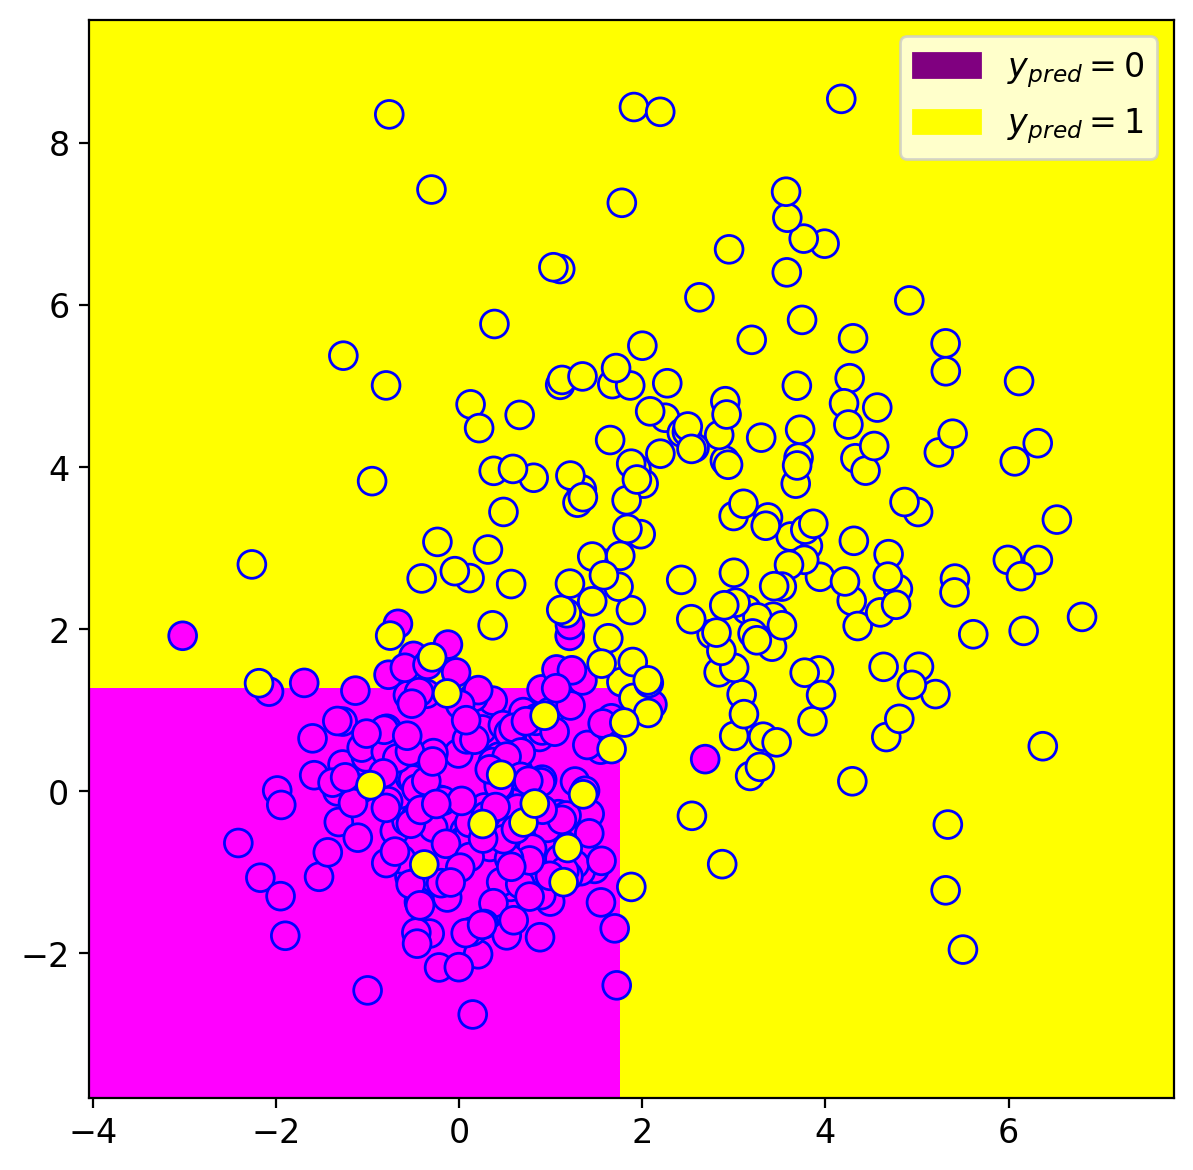

In [122]:
clf_dtc = DecisionTreeClassifier(max_depth=2).fit(X_clf, y_clf)
plot_model(X_clf, y_clf, clf_dtc)

Для регрессии можно наблюдать похожий эффект

![reg overfit](images/overfit_reg.png)

### Проблема: очень сложный алгоритм может слишком хорошо выучить выборку и давать некорректный результат на остальных данных

И хочется как минимум заметить, если такое случилось.

Как это сделать?
.

.

.

.


Чтобы заметить переобучение необходимо предварительно выборку разбить на Train и Test

На **Train** части мы будем обучать модель.

На **Test** части мы будем проверять ее качество.

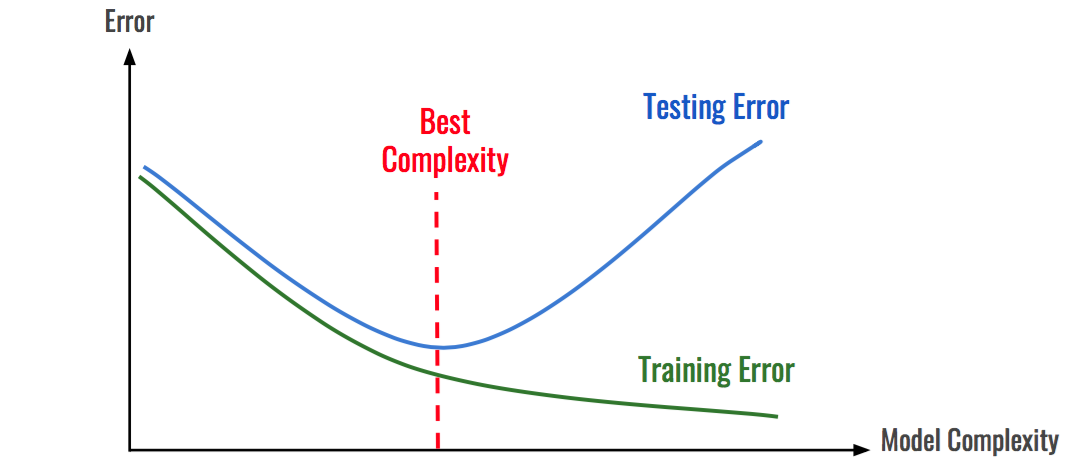

## Как мерить качество?

Слова "лучше работает" - очень субьективны, не очень понятно, что они означают.

Мы пока что только смотрим на картинки и говорим, что стало лучше или хуже. Можно ли как-то объективно и количественно измерить, насколько хорошо обучилась модель?

К счастью, да. Для этого существуют `метрики классификации`, и самая простая метрика - $accuracy$ или доля правльных ответов. Доля правильных ответов - отношение объектов, которые классифицировались правильно, ко всем объектам.

Пусть нам даны метки $y_{real}$ и результат нашего алгоритма $y_{pred}$. 

In [83]:
from sklearn.metrics import accuracy_score

y_real = np.array([0, 1, 0, 0, 1, 1, 1, 1])
y_pred = np.array([0, 1, 1, 0, 1, 1, 0, 0])

accuracy_score(y_real, y_pred)


0.625

In [126]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_clf, y_clf, test_size=0.2)

clf_dtc = KNeighborsClassifier(n_neighbors=100).fit(X_train, y_train)
accuracy_score(y_test, clf_dtc.predict(X_test))


0.8875

## мэм

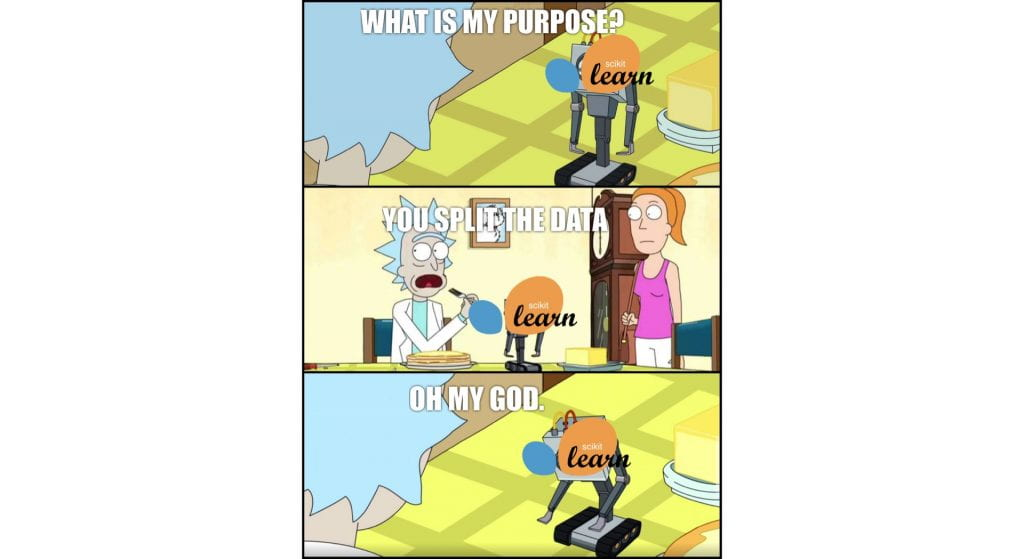